In [ ]:
import pickle
import nltk

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()

all_stopwords = stopwords.words('english')
all_stopwords.append('said')
all_stopwords.append('one')

In [ ]:
def text_opening(file_name='articles2_march.pkl'):
  ''' returns list of text 
  
  Parameters
  ----------
  file_name : str
    name of the file to open
  
  '''
  
  with open(file_name, 'rb') as f:
    text = pickle.load(f) #unpickling
  return text

def text_tokenization(text):
  ''' returns list with tokenized words written in articles
  
  Parameters
  ----------
  text: list
    text to process
  
  '''

  tok_text = []
  for podtext in text:
    tok_text.append(nltk.word_tokenize(podtext)) #adding tokenized words to the dictionary
  return tok_text

def text_pickling(text, file_name='nyt_articles_april.pkl'):
  ''' returns the file .pkl with tokenized words
  
  Parameters
  ----------
  text: list
    text to process
  file_name : str
    name of the new pickled file
  
  '''

  with open(file_name, 'wb') as f:
    pickle.dump(text, f) #pickling text

def text_processing(text):
  ''' returns list of words in infinitive from the articles without stopwords(like I, and..) and symbols
  
  Parameters
  ----------
  text: list
    text to process
  
  '''

  dictionary = list()
  for podword in text:
    for word in nltk.word_tokenize(podword):
      word = re.sub(r'[^\w\s]', '', word) #deleting the symbols
      word_root = lemmatizer.lemmatize(word) #lemmatisation

      if word_root.lower() not in all_stopwords and word_root != '' and len(word_root) > 2 and word_root.isdigit() == False:
        dictionary.append(word_root) #filling the list
  return dictionary

def common_words(dic, n=2):
  ''' returns n most common words
  
  Parameters
  ----------
  dic: list
    gets the result of the text_proceccing function
  n: int
    the amount of common words
  '''

  assert n >= 1
  word_set = {} #creating the dictionary

  for word in dic:
    word_set[word] = word_set.get(word, 0) + 1 #counting number of words found

  sorted_keys = sorted(word_set, key=word_set.get, reverse=True) #sorting the words for their nums


  return sorted_keys[0:n] #returning the first n most popular words

def word_cloud(text, num='1'):
  ''' returns the picture with wordcloud .jpg
  
  Parameters
  ----------
  text: str
    procecced text in str
  num: int
    number of file word_list
  '''

  wordcloud = WordCloud().generate(text) #generating wordcloud
  plt.imshow(wordcloud) 
  plt.axis('off')
  plt.show() #showing wordcloud 
  wordcloud.to_file('cloud'+num+'.jpg') #saving the image with wordcloud 



The first one is New York Times

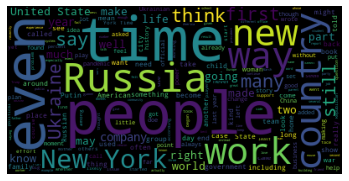

In [ ]:
text = text_opening(file_name='march_nyt.pkl') + text_opening(file_name='april_nyt.pkl')
processed_text = text_processing(text)
text_pickling(processed_text, file_name='word_list1.pkl')
text = ' '.join(processed_text)
word_cloud(text, num='1') 

The second one is The Economist

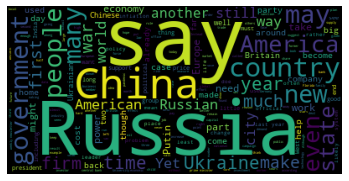

In [ ]:
text = text_opening(file_name='Everytext.pkl') 
processed_text = text_processing(text)
text_pickling(processed_text, file_name='word_list2.pkl')
text = ' '.join(processed_text)
word_cloud(text, num='2')